# Topic:
#### Earthquake Prediction

# Group Member:
#### Muhammad Umair Khan (21B-106-SE)
#### Muhammad Bilal Khan (21B-157-SE)
#### Syed Daniyal Ahmed (21B-132-SE)

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, RFE
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

## Exploratory Data Analysis (EDA): 


### Import Dataset:

In [3]:
data = pd.read_csv('PK_eq.csv')
data.head()

,Year,Month,Day,Time,Lat,Lon,Depth,Mag,Region,Timestamp
0,2022,4,11,1:41:41,33.2832,70.5607,41.2,4.8,PAKISTAN,1649641301
1,2022,3,18,2:54:11,30.1460,72.5955,15.3,4.2,PAKISTAN,1647572051
2,2022,7,31,13:42:13,25.1527,63.5489,10.0,5.6,SOUTHWESTERN PAKISTAN,1659274933
3,2022,5,6,6:21:18,26.9542,66.2725,10.0,5.2,PAKISTAN,1651818078
4,2022,7,31,13:52:16,25.1473,63.4376,10.0,5.1,SOUTHWESTERN PAKISTAN,1659275536


### Data Understanding

In [4]:
print("Shape of the dataset:", data.shape)

Shape of the dataset: (4546, 10)


In [5]:
print("Columns in the dataset:", data.columns)

Columns in the dataset: Index(['Year', 'Month', 'Day', 'Time', 'Lat', 'Lon', 'Depth', 'Mag', 'Region',
       'Timestamp'],
      dtype='object')


In [6]:
starting = data['Year'].min()
till = data['Year'].max()

print("Starting year:", starting)
print("Till year:", till)

Starting year: 1970
Till year: 2022


In [7]:
print("Data types of columns:")
print(data.dtypes)

Data types of columns:
Year           int64
Month          int64
Day            int64
Time          object
Lat          float64
Lon          float64
Depth        float64
Mag          float64
Region        object
Timestamp      int64
dtype: object


In [8]:
print("Summary Statistics:")
data.describe()

Summary Statistics:


,Year,Month,Day,Lat,Lon,Depth,Mag,Timestamp
count,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4.546000e+03
mean,2002.873295,7.116146,15.574131,31.482930,70.346297,25.202574,3.996854,1.054725e+09
std,10.029188,3.559851,8.758331,3.077798,3.283553,28.849384,0.625583,3.178132e+08
min,1970.000000,1.000000,1.000000,23.498400,61.091100,0.000000,2.100000,2.471259e+07
25%,1998.000000,4.000000,8.000000,29.610800,67.760400,10.000000,3.600000,8.969340e+08
50%,2005.000000,8.000000,15.000000,31.469400,70.619850,21.000000,3.900000,1.129399e+09
75%,2008.000000,10.000000,24.000000,34.581300,73.253425,33.000000,4.400000,1.226745e+09
max,2022.000000,12.000000,31.000000,35.123900,75.373700,831.200000,7.800000,1.666717e+09


In [9]:
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
Year         0
Month        0
Day          0
Time         0
Lat          0
Lon          0
Depth        0
Mag          0
Region       0
Timestamp    0
dtype: int64


### Visualization

##### Distribution of Magnitude


Most earthquakes in the dataset have magnitudes between 3 and 5, with magnitude 3.9 being the most frequent. The distribution is right-skewed, with fewer high-magnitude earthquakes, and magnitudes between 6 and 8 are rare. The overall shape is roughly normal but skewed to the right.

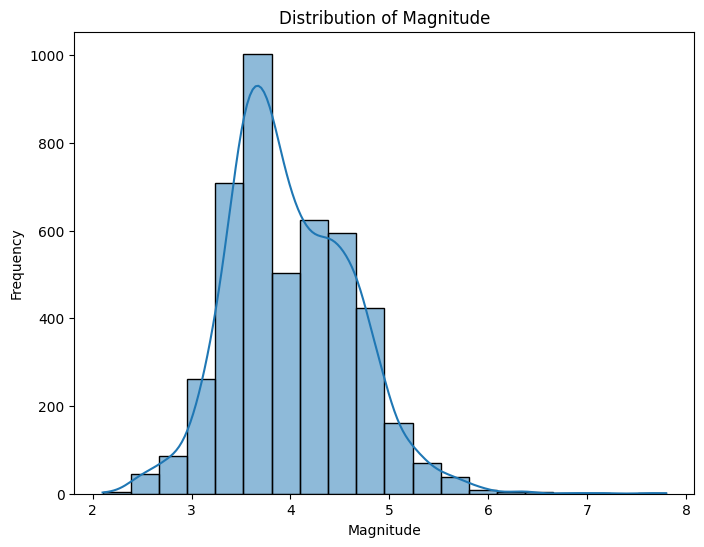

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Mag'], bins=20, kde=True)
plt.title('Distribution of Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

Average earth quake magnitude is found to be around 3.9 and 4

In [11]:
data['Mag'].mean()

3.9968543774747025

##### Distribution of Depth


The histogram with a density plot shows that depth measurements are highly right-skewed. Most depths are clustered near zero, with few observations exceeding 200. The long tail indicates some extreme values, but these are rare

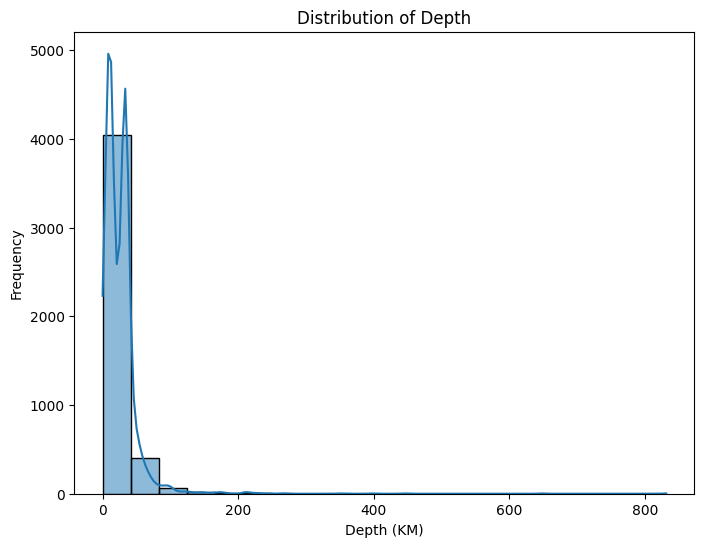

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Depth'], bins=20, kde=True)
plt.title('Distribution of Depth')
plt.xlabel('Depth (KM)')
plt.ylabel('Frequency')
plt.show()

In [13]:
data['Depth'].mean()

25.20257369115706

In [14]:
data['Depth'].max()

831.2

##### scatterplot Depth vs Magnitude


The scatter plot shows most earthquakes occur at depths below 200 km, with magnitudes ranging from 2 to 6. There is no clear correlation between depth and magnitude. Observations are rare beyond 200 km, with a few extending up to 800 units.

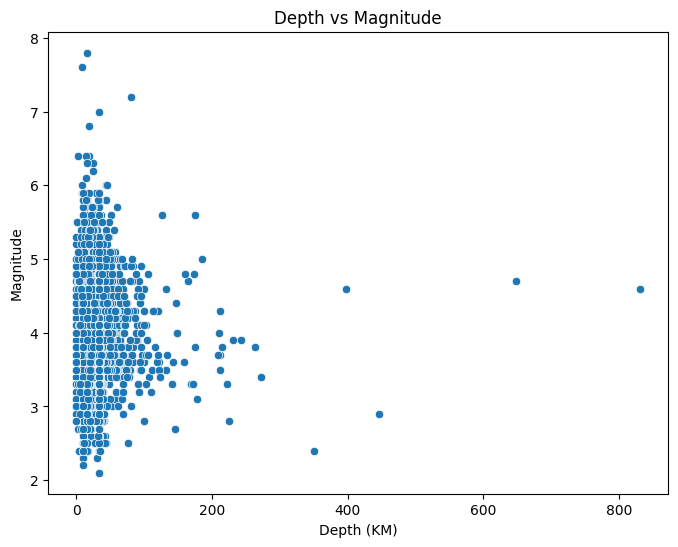

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Depth', y='Mag', data=data)
plt.title('Depth vs Magnitude')
plt.xlabel('Depth (KM)')
plt.ylabel('Magnitude')
plt.show()

##### Regions with Most Earthquakes


Note: Values with Pakistan are the ones that are not recorded with a specific location name.

The bar chart illustrates earthquake counts by region, with Pakistan showing a significantly higher count of nearly 4000 earthquakes, indicating it as a highly seismically active area. Other regions, like Southwestern Pakistan, Southwestern Kashmir, and the India-Pakistan border, have considerably lower counts, each with fewer than 500 earthquakes.

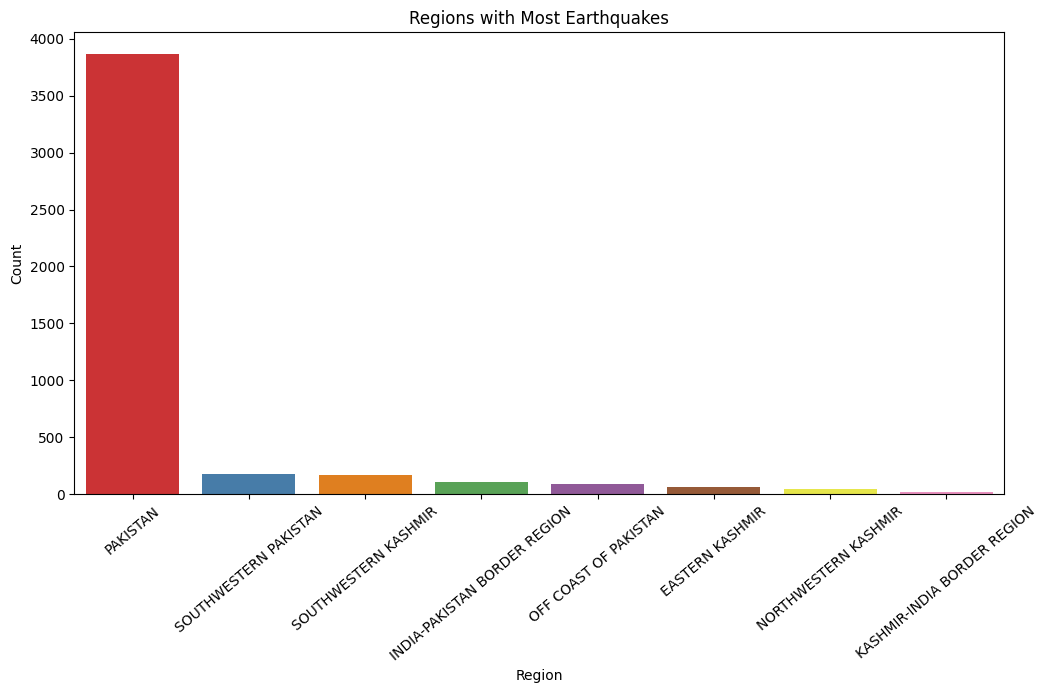

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Region', data=data, hue='Region', palette='Set1', order=data['Region'].value_counts().index[:10], legend=False)
plt.title('Regions with Most Earthquakes')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=40)
plt.show()


In [17]:
data['Region'].value_counts()

Region
PAKISTAN                        3863
SOUTHWESTERN PAKISTAN            181
SOUTHWESTERN KASHMIR             168
INDIA-PAKISTAN BORDER REGION     108
OFF COAST OF PAKISTAN             88
EASTERN KASHMIR                   68
NORTHWESTERN KASHMIR              50
KASHMIR-INDIA BORDER REGION       20
Name: count, dtype: int64

##### Count of Earthquakes by Year


The bar chart displays the frequency of earthquakes by year from 1970 to 2022, with a significant spike in 2005, recording over 1000 earthquakes, notably higher than other years. Moderate peaks are observed in years like 1997 and 2008, but they are considerably lower compared to 2005. There's an increasing trend from the late 1990s to the early 2015s. Most other years show relatively uniform earthquake counts, typically ranging between 0 and 100.

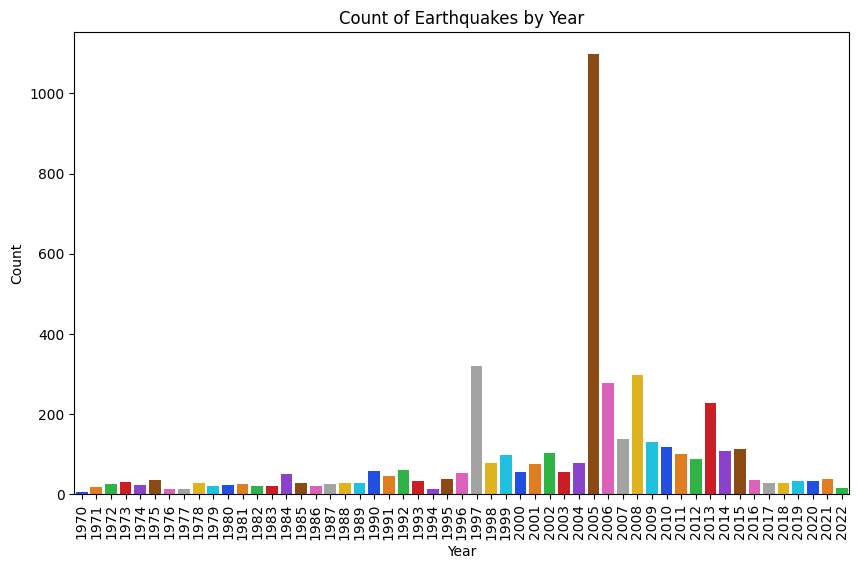

In [18]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Year', hue='Year', data=data, palette='bright')
plt.title('Count of Earthquakes by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)

ax.legend_.remove()

plt.show()

##### Count of Earthquakes by Month


The bar chart depicts the frequency of earthquakes by month, with a significant spike in October, indicating around 1100 occurrences, much higher than other months which typically range between 200 and 400 earthquakes. Some months, like March and November, also show relatively higher counts. Conversely, summer months like June, July, and August exhibit lower frequencies

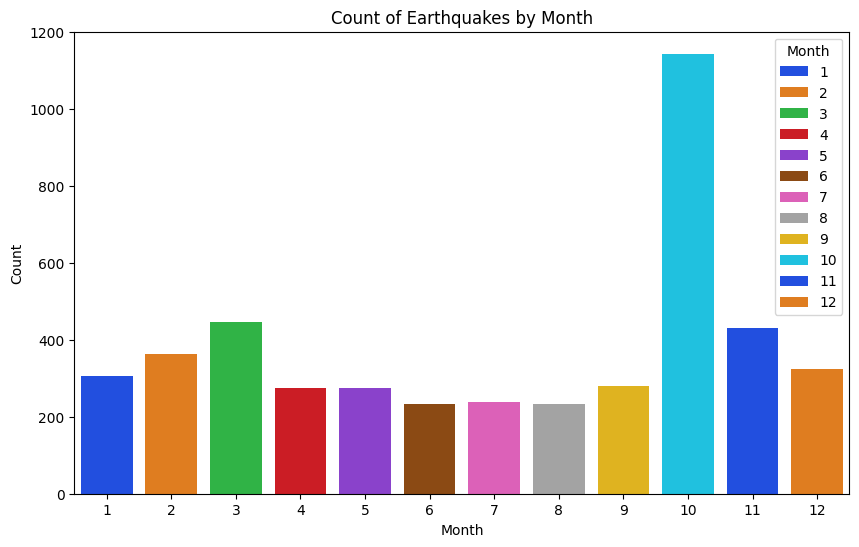

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Month',hue='Month', data=data, palette='bright')
plt.title('Count of Earthquakes by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

##### Count of Earthquakes by Day


The bar chart displays the frequency of earthquakes by day of the month, with a notable spike on the 8th day, indicating around 400 occurrences, contrasting with other days which generally range between 100 and 200 earthquakes. There's no clear pattern indicating higher likelihood of earthquakes on specific days except for the 8th

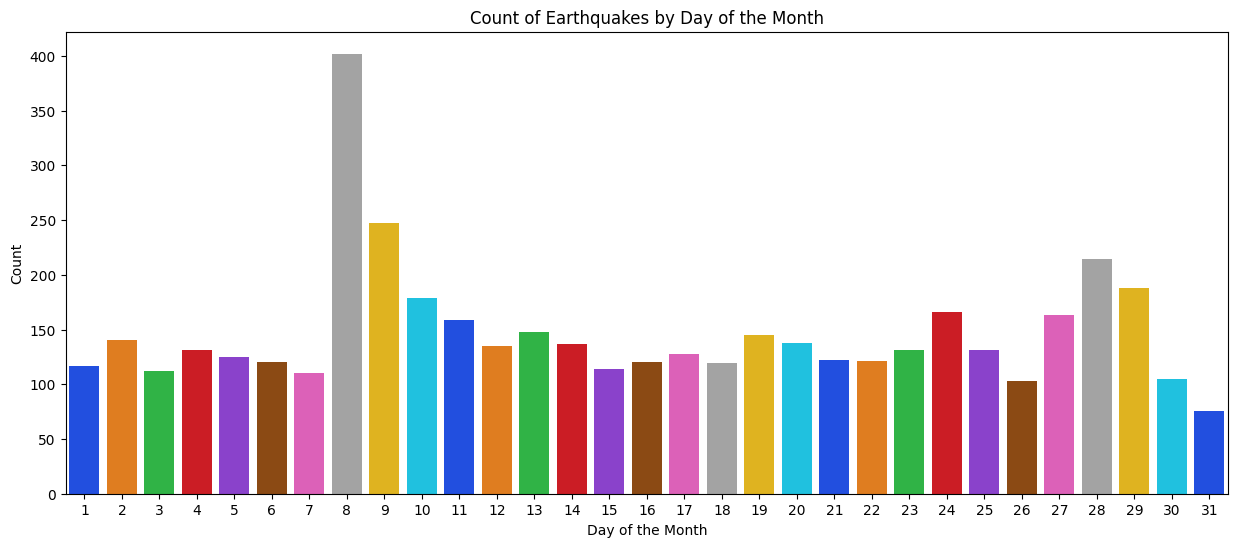

In [20]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='Day',hue='Day', data=data, palette='bright')
plt.title('Count of Earthquakes by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
ax.legend_.remove()
plt.show()

##### Correlation Heatmap


The heatmap of the correlation matrix shows that latitude and longitude have a strong positive correlation (0.88), indicating a significant relationship between these coordinates. Other correlations are weak, with depth and magnitude showing almost no relationship (0.06). Notable negative correlations include year with depth (-0.23) and magnitude (-0.24), and latitude with magnitude (-0.24). Overall, the variables do not strongly predict each other.

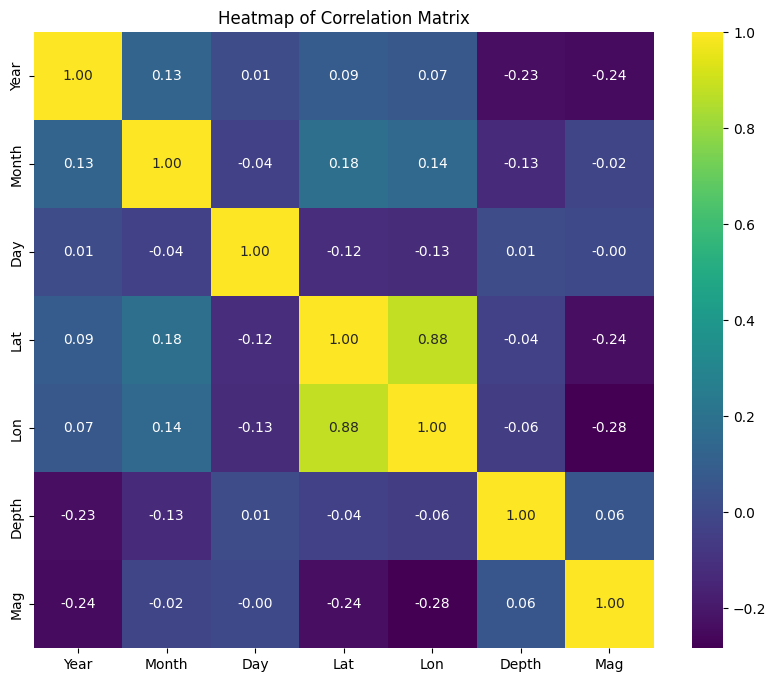

In [21]:
numeric_data = data[['Year', 'Month', 'Day', 'Lat', 'Lon', 'Depth', 'Mag']]
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap="viridis")
plt.title('Heatmap of Correlation Matrix')
plt.show()

###  Preprocessing

##### Partitioning Data

In [22]:
X = data[['Year', 'Month', 'Day', 'Lat', 'Lon', 'Depth']]
y = data['Mag']

### feature selection.

#### Statistical Method
##### ANOVA F-value

In [23]:
list_anova =[]

selector_f = SelectKBest(score_func=f_regression, k=4)  
X_new_f = selector_f.fit_transform(X, y)

selected_features_f = X.columns[selector_f.get_support()]
for feature in selected_features_f:
    list_anova.append(feature)
    
print("Selected Features (ANOVA F-value):", list_anova )

Selected Features (ANOVA F-value): ['Year', 'Lat', 'Lon', 'Depth']


##### Mutual Information

In [24]:
list_mi =[]

selector_mi = SelectKBest(score_func=mutual_info_regression, k=4)  
X_new_mi = selector_mi.fit_transform(X, y)

selected_features_mi = X.columns[selector_mi.get_support()]
for feature in selected_features_mi:
    list_mi.append(feature)

print("Selected Features (Mutual Information): ",list_mi)



Selected Features (Mutual Information):  ['Year', 'Lat', 'Lon', 'Depth']


### Machine Learning Model

##### Recursive Feature Elimination (RFE)

In [25]:
list_rfe = []
model = LinearRegression()
rfe = RFE(model, n_features_to_select=4)
X_rfe = rfe.fit_transform(X, y)

selected_features_rfe = X.columns[rfe.get_support()]

for feature in selected_features_rfe:
    list_rfe.append(feature)

print("Selected Features (Recursive Feature Elimination):", list_rfe)

Selected Features (Recursive Feature Elimination): ['Year', 'Month', 'Lat', 'Lon']


### Split the data into training and testing sets

In [26]:
# X_selected_feature = data[list_anova]
X_selected_feature = data[['Year', 'Lat', 'Lon', 'Depth', 'Month', 'Day']]
y = data['Mag']
X_train, X_test, y_train, y_test = train_test_split(X_selected_feature, y, test_size=0.3, random_state=42)


### Scaling Data

In [27]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Model Training

In this section, we trained 5 regression models provided by scikit-learn. Their details are as follow:

1. RandomForestRegressor:
    - Type: Tree-based model.
    - Best Use Case: Great for complex problems where patterns are not obvious; performs well on large datasets and can handle many input features.
2. SVR (Support Vector Regressor):
    - Type: Support Vector Machine.
    - Best Use Case: Good for situations where the relationship between inputs and outputs is not straightforward; works well with many features.
3. KNeighborsRegressor (KNN):
    - Type: Instance-based.
    - Best Use Case: Useful for small to medium-sized datasets where similar data points are likely to have similar outcomes.
4. LinearRegression:
    - Type: Linear model.
    - Best Use Case: Best for problems where the output can be predicted as a straight-line combination of the input features; simple and easy to interpret.
5. DecisionTreeRegressor:
    - Type: Tree-based model.
    - Best Use Case: Works well when the outcome depends on a series of decision rules; easy to understand and visualize.
  
After training each model, we have tested it against the test dataset to measure the mean squared error and r2 score.

#### Random Forest Regressor

In [28]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
print("MSE", mse_rf)
print("R2", r2_rf)

MSE 0.23572569428152482
R2 0.4047296808062426


#### Support Vector Regressor

In [29]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)
print("MSE", mse_svr)
print("R2", r2_svr)

MSE 0.29595250699254894
R2 0.2526408975457416


#### K-Neighbors Regressor

In [30]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred)
r2_knn = r2_score(y_test, y_pred)
print("MSE", mse_knn)
print("R2", r2_knn)

MSE 0.26923020527859237
R2 0.3201218444969943


#### Linear Regression

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
print("MSE", mse_lr)
print("R2", r2_lr)

MSE 0.34442190394942057
R2 0.13024272841281792


#### Decision Tree Regression

In [32]:
tree = LinearRegression()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred)
r2_tree = r2_score(y_test, y_pred)
print("MSE", mse_tree)
print("R2", r2_tree)

MSE 0.34442190394942057
R2 0.13024272841281792


### Insights of all models

Here we are evaluating the results of the 5 models we trained in the previous section. We are comparing the mean squared error and r2 score of each model.

The Lower the mean squared error and the higher the r2 error, the better the model performs on the dataset.

In [33]:
model_evaluation = {
    "Random Forest Regressor": {"MSE": mse_rf, "R2": r2_rf},
    "Support Vector Regressor": {"MSE":mse_svr, "R2": r2_svr},
    "K-Neighbors Regressor": {"MSE":mse_knn, "R2":r2_knn},
    "Linear Regression": {"MSE":mse_lr, "R2": r2_lr},
    "Decision Tree Regressor": {"MSE":mse_tree, "R2": r2_tree},
}

model_evaluation_df = pd.DataFrame(model_evaluation).transpose()

print(model_evaluation_df.sort_values(by=["MSE", "R2"], ascending=[True, False]))

best_model_mse = model_evaluation_df['MSE'].idxmin()
best_model_mse_score = model_evaluation_df.loc[best_model_mse, 'MSE']
print(f"\nBest Model based on MSE: {best_model_mse} (Lowest MSE: {best_model_mse_score})")

best_model_r2 = model_evaluation_df['R2'].idxmax()
best_model_r2_score = model_evaluation_df.loc[best_model_r2, 'R2']
print(f"Best Model based on R2 Score: {best_model_r2} (Highest R2 Score: {best_model_r2_score})")

                               MSE        R2
Random Forest Regressor   0.235726  0.404730
K-Neighbors Regressor     0.269230  0.320122
Support Vector Regressor  0.295953  0.252641
Linear Regression         0.344422  0.130243
Decision Tree Regressor   0.344422  0.130243

Best Model based on MSE: Random Forest Regressor (Lowest MSE: 0.23572569428152482)
Best Model based on R2 Score: Random Forest Regressor (Highest R2 Score: 0.4047296808062426)


From the above insights, we can observe that the Random Forest Regressor performed the best among the other 4 models.

### Model Improvement: 


In this section, we are trying to improve the performanee of the selected models. 

The previous section stated that the Random Forest Regressor performed the best on our dataset. Now we will try to improve the performance and accuracy by using ensemble learning methods.

Ensemble learning methods combines the results of the provided models to increase overall performance. We used Bagging, Boosting and Stacking methods. After each method is implemented, we have provided the mean squared error and r2 score we got.

In [34]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
bagged_rf = BaggingRegressor(n_estimators=10, random_state=42)
bagged_rf.fit(X_train, y_train)
y_pred_bagged_rf = bagged_rf.predict(X_test)
mse_bagged_rf = mean_squared_error(y_test, y_pred_bagged_rf)
r2_bagged_rf = r2_score(y_test, y_pred_bagged_rf)
print("Bagged Random Forest MSE:", mse_bagged_rf)
print("Bagged Random Forest R2 Score:", r2_bagged_rf)

ada_boost = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_boost.fit(X_train, y_train)
y_pred_ada_boost = ada_boost.predict(X_test)
mse_ada_boost = mean_squared_error(y_test, y_pred_ada_boost)
r2_ada_boost = r2_score(y_test, y_pred_ada_boost)
print("\n\nAdaBoost MSE:", mse_ada_boost)
print("AdaBoost R2 Score:", r2_ada_boost)

grad_boost = GradientBoostingRegressor(n_estimators=100, random_state=42)
grad_boost.fit(X_train, y_train)
y_pred_grad_boost = grad_boost.predict(X_test)
mse_grad_boost = mean_squared_error(y_test, y_pred_grad_boost)
r2_grad_boost = r2_score(y_test, y_pred_grad_boost)
print("\n\nGradient Boosting MSE:", mse_grad_boost)
print("Gradient Boosting R2 Score:", r2_grad_boost)

estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('svr', SVR()),
    ('knn', KNeighborsRegressor()),
    ('lr', LinearRegression()),
    ('tree', DecisionTreeRegressor()),
]
stacking_reg = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_reg.fit(X_train, y_train)
y_pred_stacking = stacking_reg.predict(X_test)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)
print("\n\nStacking MSE:", mse_stacking)
print("Stacking R2 Score:", r2_stacking)


Bagged Random Forest MSE: 0.26135535190615833
Bagged Random Forest R2 Score: 0.34000795192749955




AdaBoost MSE: 0.3723037942975592
AdaBoost R2 Score: 0.05983351053841901


Gradient Boosting MSE: 0.24517199713250626
Gradient Boosting R2 Score: 0.38087524384957805


Stacking MSE: 0.23026249667225063
Stacking R2 Score: 0.4185257134984077


### Comparison and Evaluation: 


Here we can see that the Stacking ensemble method helped use reach better results.

The Random Forest Regressor alone provided the results:
- MSE: 0.235726  0.404730
- R2: 0.404730

But the stacking ensemble method performed better and provided the results:
- MSE: 0.23005465652243712
- R2: 0.4190505653720986

In [35]:
metrics = {
    "Bagged Random Forest": {"MSE": mse_bagged_rf, "R2 Score": r2_bagged_rf},
    "AdaBoost": {"MSE": mse_ada_boost, "R2 Score": r2_ada_boost},
    "Gradient Boosting": {"MSE": mse_grad_boost, "R2 Score": r2_grad_boost},
    "Stacking": {"MSE": mse_stacking, "R2 Score": r2_stacking}
}

metrics_df = pd.DataFrame(metrics).transpose()

print("Evaluation Metrics:")
print(metrics_df.sort_values(by=["MSE", "R2 Score"], ascending=[True, False]))

best_model_mse = metrics_df['MSE'].idxmin()
best_model_mse_score = metrics_df.loc[best_model_mse, 'MSE']
print(f"\nBest Model based on MSE: {best_model_mse} (Lowest MSE: {best_model_mse_score})")

best_model_r2 = metrics_df['R2 Score'].idxmax()
best_model_r2_score = metrics_df.loc[best_model_r2, 'R2 Score']
print(f"Best Model based on R2 Score: {best_model_r2} (Highest R2 Score: {best_model_r2_score})")


Evaluation Metrics:
                           MSE  R2 Score
Stacking              0.230262  0.418526
Gradient Boosting     0.245172  0.380875
Bagged Random Forest  0.261355  0.340008
AdaBoost              0.372304  0.059834

Best Model based on MSE: Stacking (Lowest MSE: 0.23026249667225063)
Best Model based on R2 Score: Stacking (Highest R2 Score: 0.4185257134984077)


In [36]:
mse_improvement = mse_rf - mse_stacking
r2_improvement = r2_stacking - r2_rf

print("MSE improvement: ", mse_improvement)
print("R2 improvement: ", r2_improvement)

print("")
print(f"Percentage improvement in MSE: {(mse_improvement / mse_rf) * 100:.2f}%")
print(f"Percentage improvement in R2: {(r2_improvement / r2_rf) * 100:.2f}%")

MSE improvement:  0.00546319760927419
R2 improvement:  0.013796032692165117

Percentage improvement in MSE: 2.32%
Percentage improvement in R2: 3.41%


Here we can see that there are positive values that shows that the ensemble method Stacking performed better than the Random Forest Regressor model that previously was the best model for our dataset. The MSE improved by more than 2.41% and R2 improved by more than 3.54%

In [37]:
import pickle
pickle.dump(sc,open('scaler.pkl','wb'))
pickle.dump(stacking_reg,open('stackingModel.pkl','wb'))

### Prediction on new Data

In this section, we will use the stacking model we trained and try to predict the magnitude of the earthquake based on the features:
- year
- latitude
- longitude
- depth (in kilometers)

The output is the magnitude our models thinks the earthquake will have.

In [38]:
#feature_names = ['Year', 'Lat', 'Lon', 'Depth', 'Month', 'Day']

def get_input_features():
    while True:
        try:
            year = float(input("Enter value for Year "))
            month = float(input("Enter value for Month: "))
            day = float(input("Enter value for Day of month: "))
            lat = float(input("Enter value for Latitude: "))
            long = float(input("Enter value for longitude: "))
            depth = float(input("Enter value for Depth (in KM): "))
           
            
            
            return [year,month,day, lat, long, depth]
        except ValueError as e:
            print("Invalid input:", "All features must be numeric.")


# new_data = [[2028, 26.9542, 66.2725, 10]]: 4.68
# 2022	7	31	13:42:13	25.1527	63.5489	10.0	5.6

new_data = get_input_features()
print(new_data)
new_data = np.array(new_data).reshape(1,-1)
scale_data=sc.transform(new_data)
print(scale_data)


new_pred = stacking_reg.predict(scale_data)
print(f"Predicted magnitude: {new_pred[0]:.2f}")


Invalid input: All features must be numeric.
Invalid input: All features must be numeric.
Invalid input: All features must be numeric.


In [ ]:
pickel_model=pickle.load(open('stackingModel.pkl','rb'))
pickel_scaler=pickle.load(open('scaler.pkl','rb'))
new=[2022,7,31,25.1527,63.5489,10.0]
new=np.array(new).reshape(1,-1)
scale=pickel_scaler.transform(new)
output=pickel_model.predict(scale)[0]
print(output)

4.529481546743085


C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
